In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#importing the dataset
df =pd.read_csv("Stars.csv")
df.head()    

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
#getting some basic info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


As you can see we have 7 columns and 240 rows

### To convert categorical columns to numeric we use hot encoder

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



for column in df.columns:
  if df[column].dtype == np.int64 or df[column].dtype == np.float64:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])


In [5]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0


<AxesSubplot:>

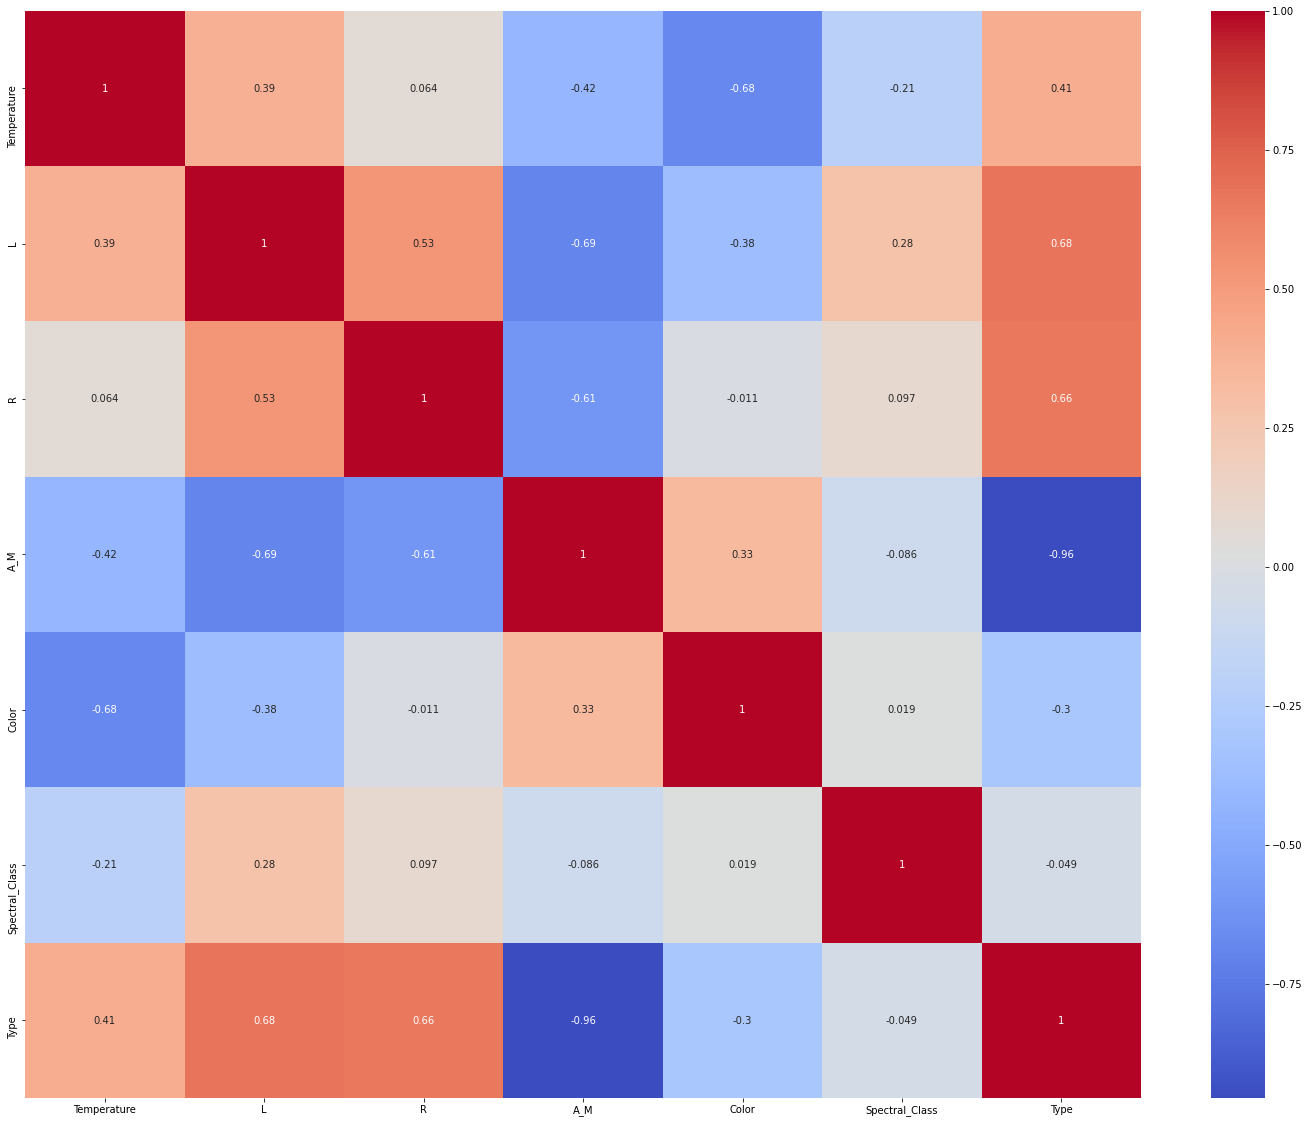

In [6]:
#Now we generate a heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


#### Now we check for columns which have higher correlation, ie>0.5 with thr type of star

In [7]:

high_corr_data = df.corr()
high_corr_columns = high_corr_data.index[abs(high_corr_data['Type'])>=0.5]
high_corr_columns

Index(['L', 'R', 'A_M', 'Type'], dtype='object')

<AxesSubplot:>

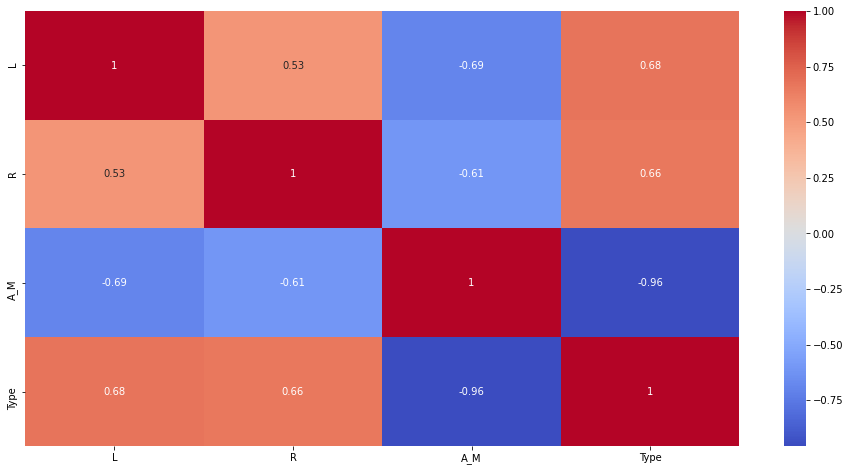

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(df[high_corr_columns].corr(), annot=True, cmap="coolwarm")


In [9]:
from sklearn.model_selection import train_test_split


#### Here we use random sampling so that each types percentage becomes equal

In [11]:
x = df.drop(columns = 'Type')
y = df['Type']

from imblearn.over_sampling import SMOTE 


In [14]:
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(x, y)

5    40
4    40
3    40
2    40
1    40
0    40
Name: Type, dtype: int64


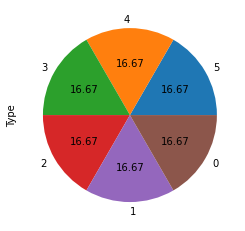

In [15]:
y_res.value_counts().plot.pie(autopct = "%.2f")

print(y_res.value_counts())

In [16]:
#Splitting data into training and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [17]:
#Let us first import the model from the sklearn module


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

#### Testing Logistic Regression

In [18]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)
print('Logistic regression accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic.predict(x_test))))

Logistic regression accuracy: 0.5625


/home/nidhi/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Accuracy is very low at 56.25%

#### Random Forest Classifier

In [19]:
model_randomforest = RandomForestClassifier()
model_randomforest.fit(x_train, y_train)
print('Random Forest accuracy: {:.4f}'.format(accuracy_score(y_test, model_randomforest.predict(x_test))))


Random Forest accuracy: 0.9792


As you can see the accuracy here is 97.92%

#### KNeighbours

In [20]:
model_knnclassfier = KNeighborsClassifier()
model_knnclassfier.fit(x_train, y_train)
print('K Neighbours accuracy: {:.4f}'.format(accuracy_score(y_test, model_knnclassfier.predict(x_test))))



K Neighbours accuracy: 0.5417


Its very low at 54.17%

#### XGBoost Classifier

In [21]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)
print('XGBoostClassifier accuracy: {:.4f}'.format(accuracy_score(y_test, model_xgb.predict(x_test))))



XGBoostClassifier accuracy: 1.0000


XGBoost Classifier accuracy is 100% so we use this one to make our predictions

But first lets plot a confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

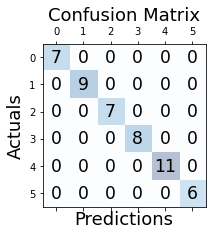

In [22]:


confusionmatrix = confusion_matrix(y_test, model_xgb.predict(x_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)



In [23]:
print(classification_report(y_test, model_xgb.predict(x_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         6

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [24]:
predictedvalues= pd.DataFrame({'Actual': y_test, 'Predicted': model_xgb.predict(x_test)})
predictedvalues.to_csv("finalpredict.csv", index=False)
predictedvalues

,Actual,Predicted
109,4,4
71,1,1
37,3,3
74,1,1
108,4,4
227,4,4
156,3,3
220,4,4
152,3,3
194,1,1
